Found 3360 images belonging to 2 classes.
Found 840 images belonging to 2 classes.


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8532 - loss: 0.3561
Epoch 1: val_accuracy improved from -inf to 0.89881, saving model to ../model/tb_cnn_model.h5


105/105 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8536 - loss: 0.3549 - val_accuracy: 0.8988 - val_loss: 0.2140
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9490 - loss: 0.1232
Epoch 2: val_accuracy improved from 0.89881 to 0.94167, saving model to ../model/tb_cnn_model.h5


105/105 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9490 - loss: 0.1230 - val_accuracy: 0.9417 - val_loss: 0.1524
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 989ms/step - accuracy: 0.9712 - loss: 0.0768
Epoch 3: val_accuracy improved from 0.94167 to 0.96905, saving model to ../model/tb_cnn_model.h5


105/105 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9712 - loss: 0.0768 - val_accuracy: 0.9690 - val_loss: 0.1165
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.9771 - loss: 0.0654
Epoch 4: val_accuracy did not improve from 0.96905
105/105 ━━━━━━━━━━━━━━━━━━━━ 76s 721ms/step - accuracy: 0.9771 - loss: 0.0653 - val_accuracy: 0.9536 - val_loss: 0.1195
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.9880 - loss: 0.0448
Epoch 5: val_accuracy improved from 0.96905 to 0.97143, saving model to ../model/tb_cnn_model.h5


105/105 ━━━━━━━━━━━━━━━━━━━━ 66s 624ms/step - accuracy: 0.9880 - loss: 0.0446 - val_accuracy: 0.9714 - val_loss: 0.0980
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.9860 - loss: 0.0447
Epoch 6: val_accuracy did not improve from 0.97143
105/105 ━━━━━━━━━━━━━━━━━━━━ 65s 618ms/step - accuracy: 0.9860 - loss: 0.0447 - val_accuracy: 0.9393 - val_loss: 0.1719
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.9896 - loss: 0.0311
Epoch 7: val_accuracy did not improve from 0.97143
105/105 ━━━━━━━━━━━━━━━━━━━━ 65s 616ms/step - accuracy: 0.9896 - loss: 0.0312 - val_accuracy: 0.9714 - val_loss: 0.0879
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.9376 - loss: 0.1681
Epoch 8: val_accuracy did not improve from 0.97143
105/105 ━━━━━━━━━━━━━━━━━━━━ 65s 617ms/step - accuracy: 0.9378 - loss: 0.1678 - val_accuracy: 0.9310 - val_loss: 0.1747
Epoch 9/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.9760 - loss: 0.0711
Epoch 9: val_ac

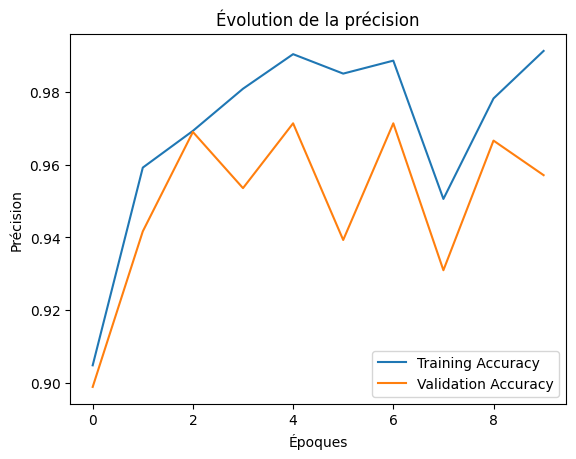

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
DATA_DIR = os.path.join('..', 'data', 'TB_Chest_Radiography_Database')

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(DATA_DIR, subset='training',
                                         target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                         class_mode='binary')
val_data = datagen.flow_from_directory(DATA_DIR, subset='validation',
                                       target_size=IMG_SIZE, batch_size=BATCH_SIZE,
                                       class_mode='binary')

model = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(32,(3,3),activation='relu'), MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'), MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'), MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
os.makedirs('../model', exist_ok=True)
checkpoint = ModelCheckpoint('../model/tb_cnn_model.h5', monitor='val_accuracy',
                             save_best_only=True, mode='max', verbose=1)
early = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_data, epochs=20, validation_data=val_data,
                    callbacks=[checkpoint, early])

# Graphique d'évolution
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.title("Évolution de la précision")
plt.legend()
plt.show()
